In [70]:
import pandas as pd
import numpy as np

In [183]:
df = pd.read_excel('biquiz.xlsx')

In [184]:
df.rename(columns ={'Numero_cliente':'client_id', 'Fecha_Update': 'update_date', 'Estatus':'status', 
                    'Motivo':'motivo', 'Tasa_Interes':'tasa_interes', 'Importe':'importe',
                  'Id_product':'product_id', 'CAT':'cat', 'TXN':'txn', 'CP':'cp', 'Puntuacion':'puntuacion',
                    'canal_venta':'sales_channel'},  inplace = True)

In [185]:
df
#Necesitamos cambiar el formato de la update_date para manejar con más facilidad la data.

,client_id,update_date,status,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel
0,3,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,8,0,0.000000,0,Sin Puntuación,Servicio al cliente
1,12,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,2,0,0.000000,0,Sin Puntuación,Servicio al cliente
2,43,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,4,0,0.000000,0,Sin Puntuación,Servicio al cliente
3,57,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,1,0,0.000000,0,Sin Puntuación,Servicio al cliente
4,98,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,1,0,0.000000,0,Sin Puntuación,Servicio al cliente
...,...,...,...,...,...,...,...,...,...,...,...,...
12751,4779,"lunes, 9 de marzo de 2020",NaN,NaN,0,0,10,0,49.748939,0,Sin Puntuación,Marketing
12752,4806,"jueves, 12 de diciembre de 2019",NaN,NaN,0,0,10,0,21.637085,0,Sin Puntuación,Marketing
12753,4810,"domingo, 1 de diciembre de 2019",NaN,NaN,0,0,10,0,672.465708,0,Sin Puntuación,Marketing
12754,4899,"miércoles, 23 de septiembre de 2020",NaN,NaN,0,0,10,0,284.578847,0,Sin Puntuación,Marketing


In [186]:
#Removemos el día de la semana de update_date
df['update_date'] = df['update_date'].str.split(',').str[-1].str.strip()
#Extraemos el dia, mes y año de la fecha
df['day'] = df['update_date'].str.split(' ').str[0]
df['month'] = df['update_date'].str.split(' ').str[2]
df['year'] = df['update_date'].str[-4:]

In [187]:
#Cambiamos el mes de string a int para formar un datetime, utilizamos un diccionario para realizar el cambio
date_dict = {'enero':1, 'febrero': 2, 'marzo': 3, 'abril':4, 'mayo':5, 'junio':6, 'julio':7,
            'agosto':8,'septiembre':9, 'octubre':10, 'noviembre':11, 'diciembre':12}
df['month_num'] = df['month'].map(date_dict)

In [188]:
#Formamos nuestra nueva fecha
cols = ['day','month_num','year']
df['date'] = df[cols].apply(lambda row:'-'.join(row.values.astype(str)), axis = 1)

In [189]:
#Eliminamos las columnas que ya no necesitamos
df.drop(['update_date', 'day', 'month', 'month_num', 'year'], axis = 1, inplace = True)

In [190]:
#Reordenamos nuestro df
df = df[['client_id', 'date', 'status', 'motivo', 'tasa_interes', 'importe', 'product_id', 'cat',
       'txn', 'cp', 'puntuacion', 'sales_channel']]
df.rename(columns = {'date':'update_date'}, inplace = True)

In [191]:
#cambiamos la columna de tipo string a datetime y ajustamos el formato 
df['update_date'] = pd.to_datetime(df['update_date'], format='%d-%m-%Y')
df['update_date'] = df['update_date'].dt.strftime('%Y-%m-%d')

In [192]:
df

,client_id,update_date,status,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel
0,3,2019-11-11,NaN,NaN,0,0,8,0,0.000000,0,Sin Puntuación,Servicio al cliente
1,12,2019-11-11,NaN,NaN,0,0,2,0,0.000000,0,Sin Puntuación,Servicio al cliente
2,43,2019-11-11,NaN,NaN,0,0,4,0,0.000000,0,Sin Puntuación,Servicio al cliente
3,57,2019-11-11,NaN,NaN,0,0,1,0,0.000000,0,Sin Puntuación,Servicio al cliente
4,98,2019-11-11,NaN,NaN,0,0,1,0,0.000000,0,Sin Puntuación,Servicio al cliente
...,...,...,...,...,...,...,...,...,...,...,...,...
12751,4779,2020-03-09,NaN,NaN,0,0,10,0,49.748939,0,Sin Puntuación,Marketing
12752,4806,2019-12-12,NaN,NaN,0,0,10,0,21.637085,0,Sin Puntuación,Marketing
12753,4810,2019-12-01,NaN,NaN,0,0,10,0,672.465708,0,Sin Puntuación,Marketing
12754,4899,2020-09-23,NaN,NaN,0,0,10,0,284.578847,0,Sin Puntuación,Marketing


In [193]:
df.sort_values(by='client_id')

,client_id,update_date,status,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel
10093,1,2020-01-14,NaN,NaN,0,0,2,0,434.112066,0,Sin Puntuación,Operaciones
5812,1,2019-11-14,RISK,NaN,0,0,8,0,0.000000,0,Sin Puntuación,Marketing
7489,1,2019-11-15,APPROVED,DIGITAL,40,1300,6,49,0.000000,0,Sin Puntuación,Servicio al cliente
4418,1,2019-11-12,RESPONSE,NaN,0,0,4,0,0.000000,0,Sin Puntuación,Operaciones
709,2,2019-11-11,NaN,NaN,0,0,4,0,0.000000,0,Sin Puntuación,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...
10231,4999,2020-04-27,NaN,NaN,0,0,2,0,35774.172717,0,Sin Puntuación,Operaciones
2344,4999,2020-04-20,DELIVERED,NaN,0,0,9,0,0.000000,44100,2,Operaciones
12604,4999,2020-04-21,NaN,NaN,0,0,3,0,31.104808,0,Sin Puntuación,Marketing
8496,4999,2020-04-18,APPROVED,PLASTIC,48,1300,7,49,0.000000,0,Sin Puntuación,Servicio al cliente


In [194]:
#STATUS -> Ajustamos los valores para que aparezca como NO RESPONSE si no hay txn o como TXN si no respondió pero 
#hubo txn
#MOTIVO ->
df['status'] = np.where((df['status'].isnull()) & (df['txn'] == 0), 'NO RESPONSE', df['status'])
df['status'] = np.where((df['status'].isnull()) & (df['txn'] > 0), 'TXN MADE', df['status'])
df['motivo'] = np.where(df['motivo'].isnull(), 'NON REJECTED', df['motivo'])

In [198]:
df

,client_id,update_date,status,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel
0,3,2019-11-11,NO RESPONSE,NON REJECTED,0,0,8,0,0.000000,0,Sin Puntuación,Servicio al cliente
1,12,2019-11-11,NO RESPONSE,NON REJECTED,0,0,2,0,0.000000,0,Sin Puntuación,Servicio al cliente
2,43,2019-11-11,NO RESPONSE,NON REJECTED,0,0,4,0,0.000000,0,Sin Puntuación,Servicio al cliente
3,57,2019-11-11,NO RESPONSE,NON REJECTED,0,0,1,0,0.000000,0,Sin Puntuación,Servicio al cliente
4,98,2019-11-11,NO RESPONSE,NON REJECTED,0,0,1,0,0.000000,0,Sin Puntuación,Servicio al cliente
...,...,...,...,...,...,...,...,...,...,...,...,...
12751,4779,2020-03-09,TXN MADE,NON REJECTED,0,0,10,0,49.748939,0,Sin Puntuación,Marketing
12752,4806,2019-12-12,TXN MADE,NON REJECTED,0,0,10,0,21.637085,0,Sin Puntuación,Marketing
12753,4810,2019-12-01,TXN MADE,NON REJECTED,0,0,10,0,672.465708,0,Sin Puntuación,Marketing
12754,4899,2020-09-23,TXN MADE,NON REJECTED,0,0,10,0,284.578847,0,Sin Puntuación,Marketing


In [196]:
#Encontramos datos que sean atípicos, debido a que son únicamente dos registros serán eliminados ya que es difícil 
#deducir cuál es la fecha correcta
df[df['update_date'] > '2022-09-19']

,client_id,update_date,status,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel
10471,3205,2023-03-30,TXN MADE,NON REJECTED,0,0,7,0,229.03571,0,Sin Puntuación,Servicio al cliente
10688,1890,2023-02-10,TXN MADE,NON REJECTED,0,0,3,0,767.06839,0,Sin Puntuación,Servicio al cliente


In [197]:
df = df.drop(df[df.update_date > '2022-09-19'].index)

In [204]:
#Revisemos como es la respuesta a nuestras campañas de MKT
mkt_df = df[df['status'] == 'RESPONSE'].sort_values(by='update_date', ascending=False)
mkt_df

,client_id,update_date,status,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel
3748,4674,2022-05-17,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Operaciones
3647,3773,2021-11-14,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing
3283,652,2021-07-18,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing
3566,3119,2021-07-03,RESPONSE,NON REJECTED,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente
3590,3282,2021-05-28,RESPONSE,NON REJECTED,0,0,6,0,0.0,0,Sin Puntuación,Operaciones
...,...,...,...,...,...,...,...,...,...,...,...,...
1670,148,2019-11-11,RESPONSE,NON REJECTED,0,0,5,0,0.0,0,Sin Puntuación,Marketing
1669,143,2019-11-11,RESPONSE,NON REJECTED,0,0,7,0,0.0,0,Sin Puntuación,Marketing
1668,142,2019-11-11,RESPONSE,NON REJECTED,0,0,3,0,0.0,0,Sin Puntuación,Marketing
1667,141,2019-11-11,RESPONSE,NON REJECTED,0,0,9,0,0.0,0,Sin Puntuación,Marketing


In [205]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [210]:
mkt_df['update_date'] = pd.to_datetime(mkt_df['update_date'], format='%Y-%m')
mkt_df['update_date'] = mkt_df['update_date'].dt.strftime('%Y-%m')

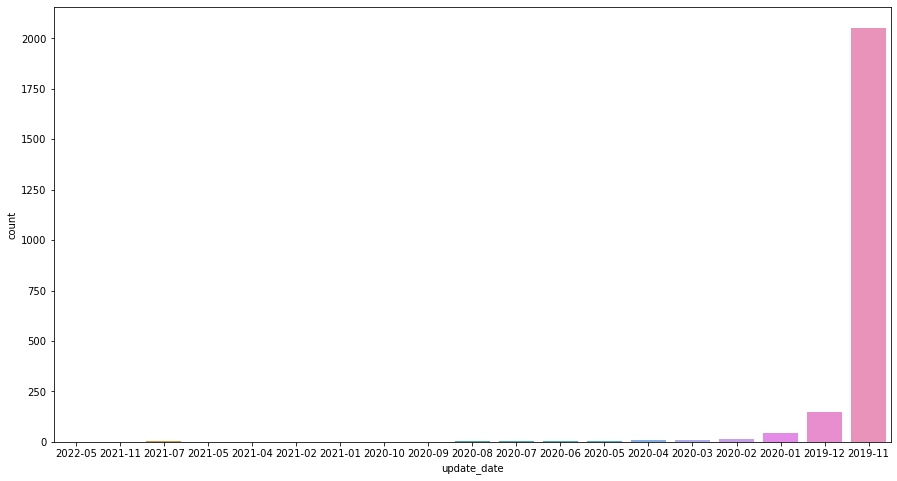

In [218]:
#Con este gráfico sabemos que debemos enfocarnos en los periodos del 2019 y 2020
plt.figure(figsize = (15,8))
ax = sns.countplot(data=mkt_df, x = 'update_date')

In [244]:
mkt_df_app = mkt_df.drop(mkt_df[mkt_df.update_date > '2022-09'].index)
mkt_df_rej = mkt_df_app

In [241]:
#Revisemos cuantos responses tuvimos y cuantos de estos resultaron en approval y rejected cards
mkt_df_app

,client_id,update_date,status,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel
3748,4674,2022-05,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Operaciones
3647,3773,2021-11,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing
3283,652,2021-07,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing
3566,3119,2021-07,RESPONSE,NON REJECTED,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente
3590,3282,2021-05,RESPONSE,NON REJECTED,0,0,6,0,0.0,0,Sin Puntuación,Operaciones
...,...,...,...,...,...,...,...,...,...,...,...,...
1670,148,2019-11,RESPONSE,NON REJECTED,0,0,5,0,0.0,0,Sin Puntuación,Marketing
1669,143,2019-11,RESPONSE,NON REJECTED,0,0,7,0,0.0,0,Sin Puntuación,Marketing
1668,142,2019-11,RESPONSE,NON REJECTED,0,0,3,0,0.0,0,Sin Puntuación,Marketing
1667,141,2019-11,RESPONSE,NON REJECTED,0,0,9,0,0.0,0,Sin Puntuación,Marketing


In [222]:
app_df = df[df['status']=='APPROVED']
rej_df = df[df['status']=='REJECTED']

In [256]:
mkt_df_app = mkt_df_app.merge(app_df[['client_id','status','update_date']], on = 'client_id', how = 'left')

In [257]:
mkt_df_app[mkt_df_app['status_y']== 'APPROVED'].sort_values(by='update_date_x')

,client_id,update_date_x,status_x,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel,status_y,update_date_y
1150,4458,2019-11,RESPONSE,NON REJECTED,0,0,8,0,0.0,0,Sin Puntuación,Operaciones,APPROVED,2019-11-14
1555,1204,2019-11,RESPONSE,NON REJECTED,0,0,10,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2019-11-18
1553,1250,2019-11,RESPONSE,NON REJECTED,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2019-11-14
1552,1254,2019-11,RESPONSE,NON REJECTED,0,0,9,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2019-11-26
1551,1262,2019-11,RESPONSE,NON REJECTED,0,0,10,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,4922,2021-01,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing,APPROVED,2021-01-26
5,569,2021-04,RESPONSE,NON REJECTED,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2021-05-02
3,3119,2021-07,RESPONSE,NON REJECTED,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2021-07-08
2,652,2021-07,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing,APPROVED,2021-08-10


In [245]:
mkt_df_rej = mkt_df_rej.merge(rej_df[['client_id','status','update_date']], on = 'client_id', how = 'left')

In [249]:
mkt_df_rej[mkt_df_rej['status_y'] == 'REJECTED'].sort_values(by='update_date_x')

,client_id,update_date_x,status_x,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel,status_y,update_date_y
1136,4910,2019-11,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Operaciones,REJECTED,2019-11-16
1474,2258,2019-11,RESPONSE,NON REJECTED,0,0,7,0,0.0,0,Sin Puntuación,Servicio al cliente,REJECTED,2019-11-15
1479,2235,2019-11,RESPONSE,NON REJECTED,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,REJECTED,2019-11-14
1482,2195,2019-11,RESPONSE,NON REJECTED,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,REJECTED,2019-11-18
1483,2174,2019-11,RESPONSE,NON REJECTED,0,0,5,0,0.0,0,Sin Puntuación,Servicio al cliente,REJECTED,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,1180,2020-08,RESPONSE,NON REJECTED,0,0,10,0,0.0,0,Sin Puntuación,Marketing,REJECTED,2020-08-25
10,4298,2020-08,RESPONSE,NON REJECTED,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,REJECTED,2020-09-08
6,2950,2021-02,RESPONSE,NON REJECTED,0,0,1,0,0.0,0,Sin Puntuación,Operaciones,REJECTED,2021-02-22
4,3282,2021-05,RESPONSE,NON REJECTED,0,0,6,0,0.0,0,Sin Puntuación,Operaciones,REJECTED,2021-06-04


In [262]:
#Unimos los dfs para ver la comparativa
mkt_plot = pd.concat([mkt_df_app, mkt_df_rej])

In [264]:
mkt_plot.dropna(subset=['status_y'])

,client_id,update_date_x,status_x,motivo,tasa_interes,importe,product_id,cat,txn,cp,puntuacion,sales_channel,status_y,update_date_y
0,4674,2022-05,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Operaciones,APPROVED,2022-05-22
2,652,2021-07,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing,APPROVED,2021-08-10
3,3119,2021-07,RESPONSE,NON REJECTED,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2021-07-08
5,569,2021-04,RESPONSE,NON REJECTED,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,APPROVED,2021-05-02
7,4922,2021-01,RESPONSE,NON REJECTED,0,0,2,0,0.0,0,Sin Puntuación,Marketing,APPROVED,2021-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,327,2019-11,RESPONSE,NON REJECTED,0,0,4,0,0.0,0,Sin Puntuación,Marketing,REJECTED,2019-11-18
2280,317,2019-11,RESPONSE,NON REJECTED,0,0,7,0,0.0,0,Sin Puntuación,Marketing,REJECTED,2019-11-14
2289,201,2019-11,RESPONSE,NON REJECTED,0,0,7,0,0.0,0,Sin Puntuación,Marketing,REJECTED,2019-11-15
2293,148,2019-11,RESPONSE,NON REJECTED,0,0,5,0,0.0,0,Sin Puntuación,Marketing,REJECTED,2019-11-16


Text(0, 0.5, 'Request count')

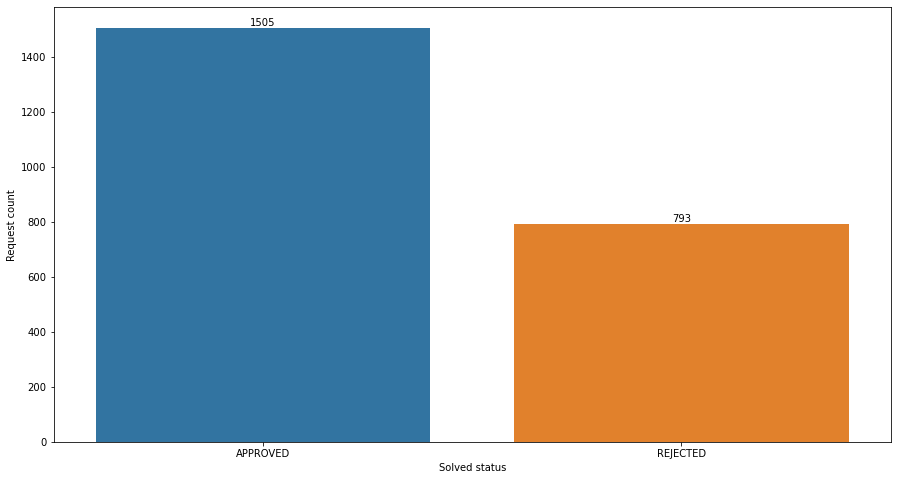

In [272]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data=mkt_plot, x = 'status_y')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Solved status')
ax.set_ylabel('Request count')